In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (400., 150.)
from salem import get_demo_file, open_xr_dataset, GeoTiff, wgs84
%matplotlib inline
import glob
from utils import u_darrays as uda, u_arrays as ua
import cartopy.crs as ccrs
import cartopy
import pandas as pd
from wavelet import util, wav
import ipdb
import h5py as h5
import os
import ipdb

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


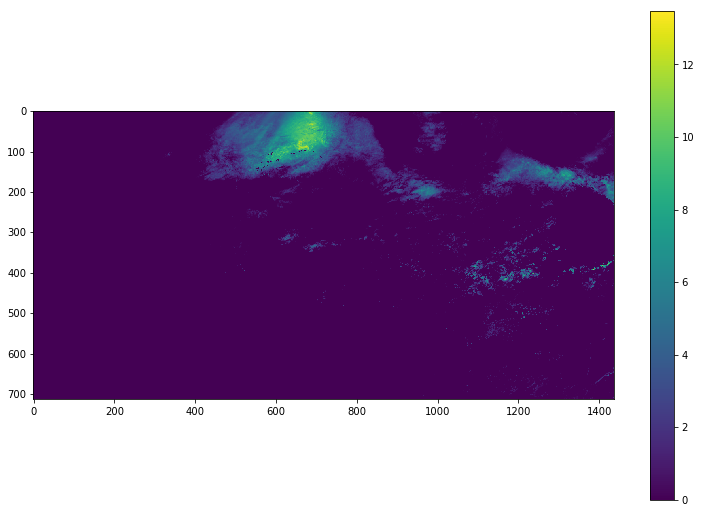

In [72]:
## use matplotlib coastlines for verification
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111)
mp = ax.imshow(dat, vmin=0)
plt.colorbar(mp)


In [56]:
filepath = glob.glob('/home/ck/DIR/cornkle/data/NFLICS/LSTA_nowcast/data_anom_wrt_historic_clim_withmask/*/*.nc')

In [57]:
filepath = glob.glob('/home/ck/DIR/cornkle/data/NFLICS/LSTA_nowcast/data_anom_wrt_historic_clim_withmask/*/*.nc')
for ff in filepath:
    dat = xr.open_dataarray(ff)

    dat.values[np.isnan(dat.values)]=0
    dat.values[dat.values>1000]=0
    dic = util.applyHat_pure(dat, dataset='NOWCAST')
    
    da = xr.DataArray(np.array(np.round(dic['coeffs'],2)*100).astype(int), coords={'scales' : dic['scales'], 'phony_dim_0': dat.phony_dim_0, 'phony_dim_1': dat.phony_dim_1}, dims=['scales', 'phony_dim_0', 'phony_dim_1'])
    da.name = 'wavelet_coeff'
    
    outpath = ff.replace('data_anom_wrt_historic_clim_withmask', 'data_anom_wrt_historic_clim_withmask_wavelet')
    outpath = outpath.replace('withHistClim', 'withHistClim_wavelet')
    #ipdb.set_trace()
    if not os.path.isdir(os.path.dirname(outpath)):
            os.makedirs(os.path.dirname(outpath))
            
            
    comp = dict(zlib=True, complevel=5)
    encoding = {'wavelet_coeff': comp}

    try:
        da.to_netcdf(outpath, format='NETCDF4', encoding=encoding)
    except OSError:
        print('Did not find ' + outpath)
        print('Out directory not found')
                      
    

In [62]:
dat0 = xr.open_dataarray('/home/ck/DIR/cornkle/data/NFLICS/LSTA_nowcast/data_anom_wrt_historic_clim_withmask/202006/LSASAF_lst_anom_Daymean_withmask_withHistClim_20200617.nc')
dat = xr.open_dataarray('/home/ck/DIR/cornkle/data/NFLICS/LSTA_nowcast/data_anom_wrt_historic_clim_withmask_wavelet/202006/LSASAF_lst_anom_Daymean_withmask_withHistClim_wavelet_20200617.nc')
dat2 = xr.open_dataarray('/home/ck/DIR/cornkle/data/NFLICS/LSTA_nowcast/data_anom_wrt_historic_clim_withmask_wavelet/202006/LSASAF_lst_anom_Daymean_withmask_withHistClim_wavelet_20200619_old.nc')

In [63]:
dat0.values[np.isnan(dat0.values)]=0
dat0.values[dat0.values>1000]=0

In [64]:
dat.scales

<xarray.DataArray 'scales' (scales: 11)>
array([ 20.      ,  26.390158,  34.822023,  45.947934,  60.628663,  80.      ,
       105.560633, 139.28809 , 183.791737, 242.514651, 320.      ])
Coordinates:
  * scales   (scales) float64 20.0 26.39 34.82 45.95 ... 139.3 183.8 242.5 320.0

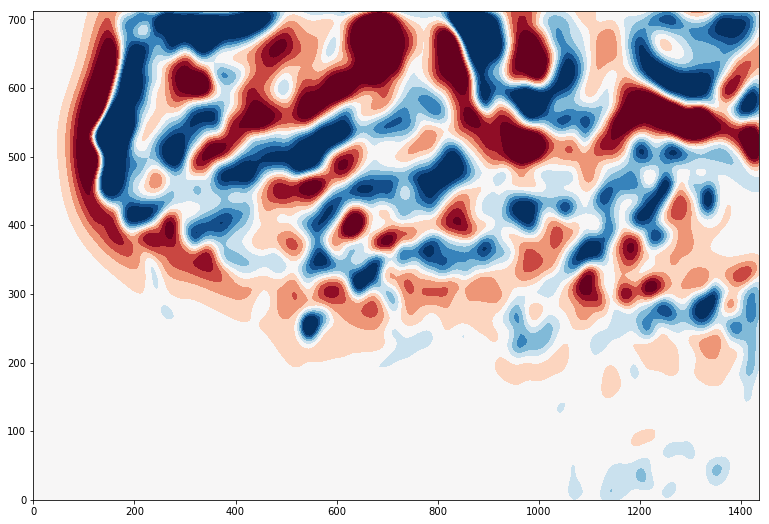

In [84]:
## use matplotlib coastlines for verification
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111)
mp = ax.contourf(np.flip(np.mean(dat[6:10,:,:]/100, axis=0),axis=0)  , levels=np.linspace(-100,100,10), cmap='RdBu_r', extend='both')
#mp = ax.contour(np.flip(dat0, axis=0), levels=np.linspace(-15,15,10), cmap='RdBu_r')
#plt.colorbar(mp)

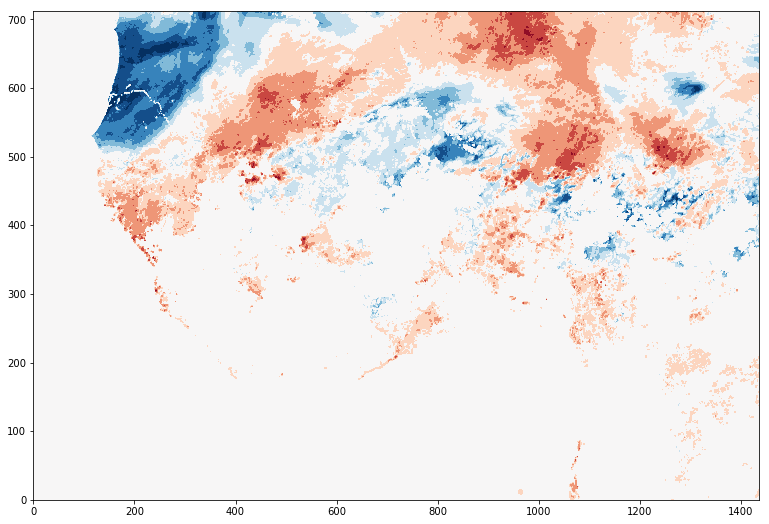

In [34]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111)
mp = ax.contourf(np.flip(dat0, axis=0), levels=np.linspace(-10,10,10), cmap='RdBu_r', extend='both')

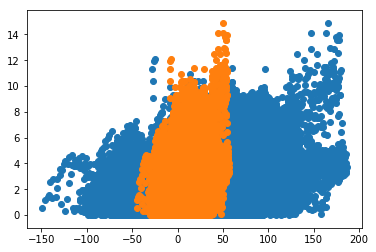

In [166]:
poss = np.where(dat0.values>0)
plt.scatter(dat2.values[2,:,:][poss], dat0.values[poss])
plt.scatter(dat.values[2,:,:][poss], dat0.values[poss])

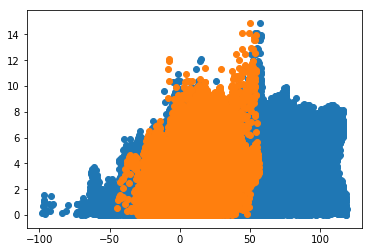

In [167]:
plt.scatter(dat.values[5,:,:][poss], dat0.values[poss])
plt.scatter(dat.values[2,:,:][poss], dat0.values[poss])

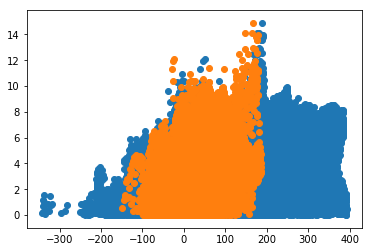

In [168]:
plt.scatter(dat2.values[5,:,:][poss], dat0.values[poss])
plt.scatter(dat2.values[2,:,:][poss], dat0.values[poss])

In [32]:
points = np.array(list(zip(coords.WA_lon.values.flat, (coords.WA_lat.values).flat)))

In [33]:
dat.lat.values

array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.0275,  0.0275,  0.0275, ...,  0.0275,  0.0275,  0.0275],
       [ 0.055 ,  0.055 ,  0.055 , ...,  0.0549,  0.055 ,  0.055 ],
       ...,
       [20.1981, 20.1973, 20.1964, ..., 20.1956, 20.1964, 20.1973],
       [20.2286, 20.2277, 20.2269, ..., 20.226 , 20.2269, 20.2277],
       [20.259 , 20.2582, 20.2573, ..., 20.2565, 20.2573, 20.2582]])

In [34]:
out = ua.closest_point((-16.47, 19.33), points) # lon, lat ## define coastal point from google maps..

In [35]:
spos = np.unravel_index(out, coords.WA_lon.values.shape)

In [36]:
spos

(686, 159)

/home/ck/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'projection'
  s)


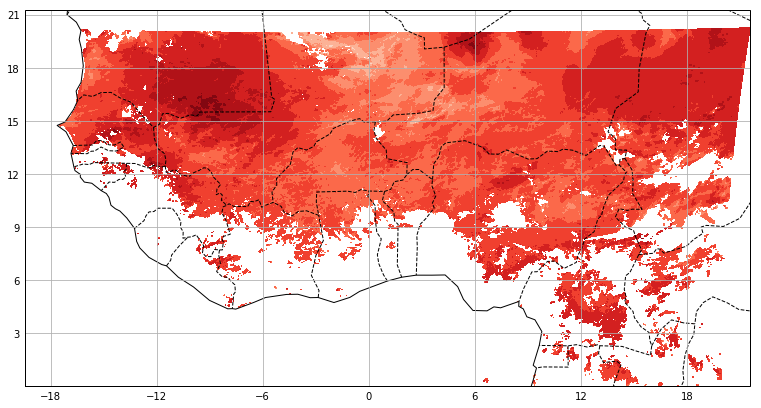

In [37]:
## use matplotlib coastlines for verification
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
ax.contourf(dat.lon.values, dat.lat.values, dat['lsta'].values, cmap='Reds', projection=ccrs.PlateCarree())
ax.coastlines()   ## adds coastlines
#plt.plot(spos[0], spos[1], 'bo')
# Gridlines
xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
xl.xlabels_top = False   ## labels off
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
#f.savefig('/home/ck/DIR/cornkle/data/NFLICS/NFLICS_lsta_test.png')

Text(0.5,1,'Blue dot should be at the coastline')

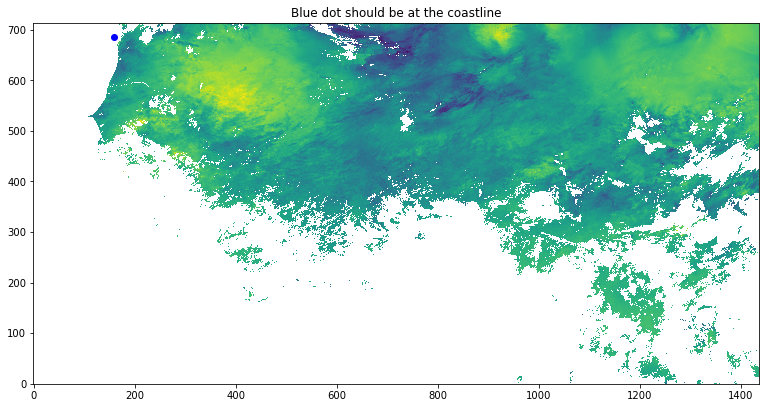

In [38]:
# use google maps geoloc point for verification
f = plt.figure(figsize=(13,9))
plt.imshow(dat['lsta'].values, origin='lower')
plt.plot(spos[1], spos[0], 'bo')
plt.title('Blue dot should be at the coastline')